# Video 3.2.1 - Root Mean Squared Error

In [35]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [36]:
#changing the work directory
os.chdir('/Users/admin/Desktop/Synergyx Dataset')

In [37]:
#reading the data
data = pd.read_csv('Synergix_data_preprocessed_new.csv')
data.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [39]:
#drop Units_sold column
data.drop(columns = 'Units_sold>1000', axis = 1, inplace = True)

In [40]:
#check the data
data.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Num_of_Promotions,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0


## Good by Bad Ratings

In [41]:
#Storing the ratio in a list named Rating_ratio
Rating_ratio = []
for row in data.values:
    if(row[4]+row[5] == 0):
        if(row[7]+row[8] == 0):
            #If all the ratings are zero then overall rating ratio will also be zero
            Rating_ratio.append(0.0)
        else:
            #If only the numerator(1 and 2 star) ratings are zero then add -99999 to the list temporarily which 
            #will be taken care of in the next part of the code
            Rating_ratio.append(-99999)
    else:
        Rating_ratio.append((int(row[7])+int(row[8]))/(int(row[4])+int(row[5])));
              

#replacing -99999 with the maximum rating in the list
max_rating = max(Rating_ratio)
for x in range(len(Rating_ratio)):
    if(Rating_ratio[x] == -99999):
        Rating_ratio[x] = max_rating

In [42]:
#replacing -99999 with the maximum rating in the list
max_rating = max(Rating_ratio)
for x in range(len(Rating_ratio)):
    if(Rating_ratio[x] == -99999):
        Rating_ratio[x] = max_rating

In [43]:
#adding the column 'Good_By_Bad_Rating' to the dataframe
data['Good_By_Bad_Rating'] = Rating_ratio

In [44]:
#drop the rating columns
data.drop(columns = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating'], inplace = True)

## One-hot Encoding

In [45]:
#one-hot encoding
data = pd.get_dummies(data, columns = ['Segment'], prefix = 'Segment', drop_first = True)
data.head()

,Page_traffic,Unit_price,Units_sold,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,...,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Good_By_Bad_Rating,Segment_Makeup,Segment_Skincare
0,5835.0,22.214389,2071,6.0,6.0,89.0,141.0,3.0,3.0,0.0,...,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,21.783626,False,True
1,1881.0,11.870778,681,9.0,8.0,126.0,149.0,13.0,16.0,0.0,...,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,18.397906,False,True
2,2477.0,27.645714,875,10.0,7.0,152.0,186.0,4.0,20.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,20.274611,True,False
3,4087.0,16.896848,1396,5.0,7.0,117.0,209.0,7.0,20.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,16.171233,True,False
4,1446.0,16.357664,822,0.0,8.0,165.0,158.0,4.0,16.0,0.0,...,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,26.811321,False,False


<h2>Performing Train Test Split</h2>

In [46]:
#Separating the independent and target variables
y = data['Units_sold']
X = data.drop(columns = ['Units_sold'], axis = 1)

In [47]:
#Quick look at the shape of the data
X.shape, y.shape

((19631, 21), (19631,))

In [48]:
#import train test split
from sklearn.model_selection import train_test_split

In [50]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
#A quick look at the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13741, 21), (5890, 21), (13741,), (5890,))

<h2>Feature Scaling</h2>

In [52]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [53]:
#create an instance for StandardScaler
scaler = StandardScaler()

In [54]:
#let's transform the train data
X_train_scaled = scaler.fit_transform(X_train)

In [55]:
X_test_scaled = scaler.transform(X_test)

<h2>KNN Model</h2>

In [56]:
#import the necessary class
from sklearn.neighbors import KNeighborsRegressor

In [57]:
#setting the value k or neighbors at 5
knn_model = KNeighborsRegressor()

In [58]:
#training the knn model with train data
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [59]:
#making predictions on the same training data
y_train_pred = knn_model.predict(X_train_scaled)

In [60]:
#making predictions on the test data based on the learniing from fitting model on the train data
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1327. , 1114.8,    0. , ..., 1172.6,  572. , 1743.8])

<h2>Evaluating the Model - MAE and RMSE</h2>

In [61]:
#import mse and sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [62]:
#calculate the mae score
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred)
print('Train MAE score: ', train_mae)
print('Test MAE score: ', test_mae)

Train MAE score:  146.77272396477696
Test MAE score:  191.74954159592528


In [63]:
#calculate the rmse score
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Train RMSE score: ', train_rmse)
print('Test RMSE score: ', test_rmse)

Train RMSE score:  198.1990616274034
Test RMSE score:  257.053211458683


<h1> Video 3.2.2 </h1>

## R2 Score

In [64]:
#calculate the R2 score for train and test set
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)
print('Train R2 score: ', train_r2)
print('Test R2 score: ', test_r2)

Train R2 score:  0.8066205955219263
Test R2 score:  0.6855226236540191


## Adjusted R2 - Score

Since the formula for Adjusted r2 requires us to use the number of observations and number of variables, we will use the .shape function to get the 'n' and 'p' values in the formula. 

In [67]:
#extracting the number of variables and observations in train and test data
train_n = X_train.shape[0]
train_p = X_train.shape[1]
test_n = X_test.shape[0]
test_p = X_test.shape[1]

In [68]:
#calculate adjusted r2 for train and test data
train_adjusted_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)
print("Train Adjusted R2 score:", train_adjusted_r2)
print("Test Adjusted R2 score:", test_adjusted_r2)

Train Adjusted R2 score: 0.8063245850624148
Test Adjusted R2 score: 0.6843971933705724


# Choosing the right value of K

In [65]:
#for loop to get accuracy scores for train and test for k values ranging from 1 to 51
train_r2_score = []
test_r2_score = []
for n in range(1,51):
    
    knn_model = KNeighborsRegressor(n_neighbors = n)
    knn_model.fit(X_train_scaled, y_train)
    
    y_train_pred = knn_model.predict(X_train_scaled)
    y_pred = knn_model.predict(X_test_scaled)
    
    train_r2_score.append(r2_score(y_train, y_train_pred))
    test_r2_score.append(r2_score(y_test, y_pred))

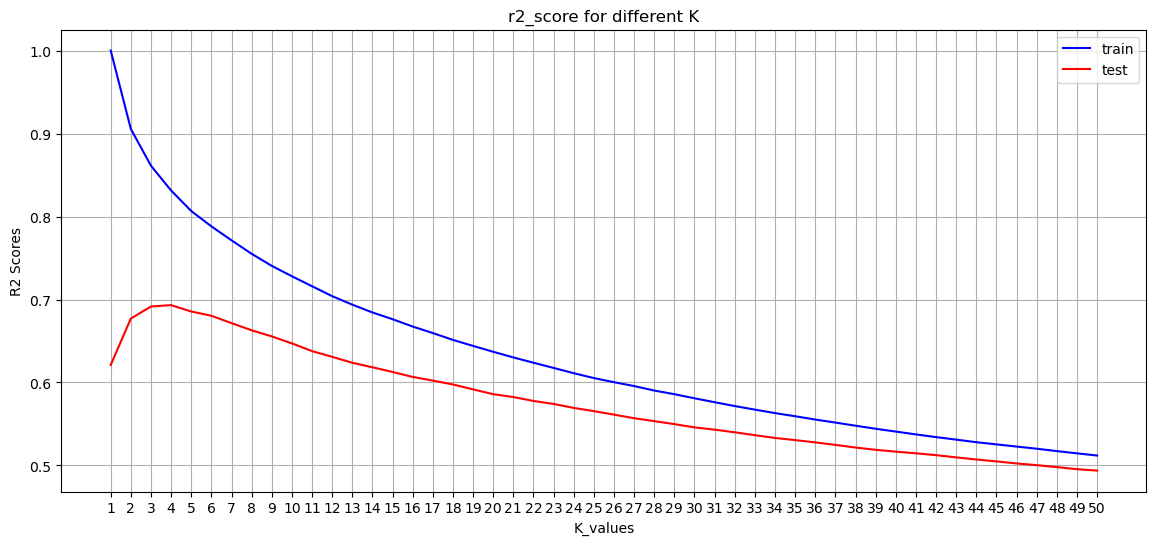

In [70]:
#plot the accuracy scores
plt.figure(figsize = (14,6))
plt.title('r2_score for different K')
plt.plot(np.arange(1, len(train_r2_score)+1), train_r2_score, color = 'blue', label = 'train')
plt.plot(np.arange(1, len(train_r2_score)+1), test_r2_score, color = 'red', label = 'test')
plt.xticks(np.arange(1, len(train_r2_score)+1))
plt.xlabel('K_values')
plt.ylabel('R2 Scores')
plt.legend()
plt.grid()
plt.show()



The graph over here is very similar to what we got for classification. With low number of neighbors from 3-5, we get the highest test performsnce. But, there is significant gap between train and test scores. AS we increase the number of neighbors, the gap between the train and the test reduces. However the performance on the test set goes down gradually. 

Now, coming to which model we should choose for Synergix, well, there is no right answer to this-
- If the business is more concerned about the best-performing model that gives the highest accuracy scores on test data, then k=4 is the best model for Synergix. 
- On the other hand, if building a consistent model is more important for Synergix, then choosing one of the Good Fit Models would be preferable. 

For our comparison, let us choose k = 4 as the model of our choice. Just as a reminder, this simple of finding the right hyperparameter is not the best approach. We will learn the recommended practice in the next course.


In [71]:
#setting the value k or neighbors at 4
knn_model = KNeighborsRegressor(4)

#training the knn model with train data
knn_model.fit(X_train_scaled, y_train)

#making predictions on the test data based on the learniing from fitting model on the train data
y_pred = knn_model.predict(X_test_scaled)

#calculate the R2 score for test set
test_r2_4k = r2_score(y_test, y_pred)
print('Test R2 score: ', test_r2_4k)

Test R2 score:  0.693208565060998
